In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [3]:
data = pd.read_excel('data_71.xls', header = 0)

In [4]:
data.head()

,NPV,IRR,PBP,OUT
0,86,0.10,2.3,отклонить
1,92,0.22,2.4,рассмотрение
2,-10,0.19,2.9,отклонить
3,474,0.51,1.7,рассмотрение
4,614,0.77,1.4,принять


In [5]:
data['OUT'].value_counts(normalize = True)

рассмотрение    0.45
отклонить       0.30
принять         0.25
Name: OUT, dtype: float64

In [7]:
Y = data['OUT']
X_1 = data.drop(['OUT'], axis = 1)
X = (X_1 - X_1.min())/(X_1.max() - X_1.min())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y, random_state=2022, test_size=0.25)

In [9]:
Y_train.head()
Y_test.head()
#Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [10]:
#оцифровка
for i in range(len(Y_train)):
    if Y_train[i] == 'отклонить':
        Y_train[i] = np.float32(0)
    elif Y_train[i] == 'рассмотрение':
        Y_train[i] = np.float32(1)
    else:
        Y_train[i] = np.float32(2)
for i in range(len(Y_test)):
    if Y_test[i] == 'отклонить':
        Y_test[i] = np.float32(0)
    elif Y_test[i] == 'рассмотрение':
        Y_test[i] = np.float32(1)
    else:
        Y_test[i] = np.float32(2)
Y_train = np.float32(Y_train)
Y_test = np.float32(Y_test)
Y_train

array([2., 1., 1., 1., 2., 2., 0., 1., 0., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [11]:
y_train_bin = np_utils.to_categorical(Y_train)
y_test_bin = np_utils.to_categorical(Y_test)

In [12]:
y_train_bin[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [15]:
# Creating a model
from keras import optimizers
from keras import initializers

#init = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=5023)
#init_const = initializers.Constant(value = 1e-2)
#kernel_initializer=init, bias_initializer=init_const
#kernel_initializer=init, bias_initializer=init_const

model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


# Training a model
classifier = model.fit(X_train, y_train_bin, epochs=300, batch_size=5)

Epoch 1/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.4667
Epoch 2/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.7333
Epoch 3/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.7333
Epoch 4/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1769 - accuracy: 0.7333
Epoch 5/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1765 - accuracy: 0.7333
Epoch 6/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.7333
Epoch 7/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1761 - accuracy: 0.7333
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.7333
Epoch 9/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.7333
Epoch 10/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.7333
Epoch 11/300
3/3 [===========

3/3 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.7333
Epoch 85/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.7333
Epoch 86/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.7333
Epoch 87/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1569 - accuracy: 0.7333
Epoch 88/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.7333
Epoch 89/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1565 - accuracy: 0.7333
Epoch 90/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.7333
Epoch 91/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.7333
Epoch 92/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1560 - accuracy: 0.7333
Epoch 93/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1558 - accuracy: 0.7333
Epoch 94/300
3/3 [===============

3/3 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.7333
Epoch 168/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.7333
Epoch 169/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1443 - accuracy: 0.7333
Epoch 170/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.7333
Epoch 171/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1441 - accuracy: 0.7333
Epoch 172/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1440 - accuracy: 0.7333
Epoch 173/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1439 - accuracy: 0.7333
Epoch 174/300
3/3 [==============================] - 0s 5ms/step - loss: 0.1438 - accuracy: 0.7333
Epoch 175/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1437 - accuracy: 0.7333
Epoch 176/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1436 - accuracy: 0.7333
Epoch 177/300
3/3 [=====

3/3 [==============================] - 0s 6ms/step - loss: 0.1376 - accuracy: 0.7333
Epoch 250/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1375 - accuracy: 0.7333
Epoch 251/300
3/3 [==============================] - 0s 6ms/step - loss: 0.1374 - accuracy: 0.7333
Epoch 252/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.7333
Epoch 253/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.7333
Epoch 254/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.7333
Epoch 255/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.7333
Epoch 256/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.7333
Epoch 257/300
3/3 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.7333
Epoch 258/300
3/3 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.7333
Epoch 259/300
3/3 [=====

In [16]:
# evaluate the model
scores = model.evaluate(X_test, np.float32(Y_test))
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 203ms/step - loss: 1.3112 - accuracy: 0.2000

Accuracy: 20.00%


In [17]:
# calculate predictions
predictions = model.predict(X_test)
print(predictions[0:5])

[[1.8404621e-01 5.6645709e-01 2.4949674e-01]
 [1.8404621e-01 5.6645709e-01 2.4949674e-01]
 [1.8404621e-01 5.6645709e-01 2.4949674e-01]
 [1.0000000e+00 4.3494339e-25 2.3213074e-19]
 [1.8404621e-01 5.6645709e-01 2.4949674e-01]]


In [18]:
loss_values = classifier.history['loss']

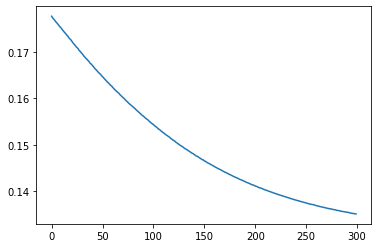

In [19]:
plt.plot(loss_values)

In [22]:
new_row = pd.DataFrame({'NPV': [-50], 'IRR': [0.1], 'PBP': [10]})
new_row = ((new_row - X_1.min())/(X_1.max() - X_1.min())).values
pr = model.predict(new_row)
pr
#ЗНАЧИТ, БУДЕТ В РАССМОТРЕНИИ

array([[0.18560429, 0.56490207, 0.24949367]], dtype=float32)

In [97]:
X_train

array([[ 4.82e+02,  6.40e-01,  1.10e+00],
       [ 2.69e+02,  3.10e-01,  2.10e+00],
       [ 4.74e+02,  5.10e-01,  1.70e+00],
       [ 9.20e+01,  2.20e-01,  2.40e+00],
       [ 8.40e+02,  5.90e-01,  1.50e+00],
       [ 6.17e+02,  8.30e-01,  1.00e+00],
       [ 8.60e+01,  1.00e-01,  2.30e+00],
       [ 2.56e+02,  2.90e-01,  2.50e+00],
       [-1.00e+01,  1.90e-01,  2.90e+00],
       [ 8.70e+01,  2.00e-01,  3.60e+00],
       [-7.80e+01,  1.10e-01,  3.10e+00],
       [ 3.41e+02,  3.40e-01,  2.30e+00],
       [ 1.64e+02,  2.50e-01,  3.20e+00],
       [-5.10e+01,  1.20e-01,  3.80e+00],
       [ 1.64e+02,  2.30e-01,  3.60e+00]])